In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import roc_tools as rtp
import pylab as plt
import numpy
import itertools

import datetime as dtm
import pytz


lens:  25 25


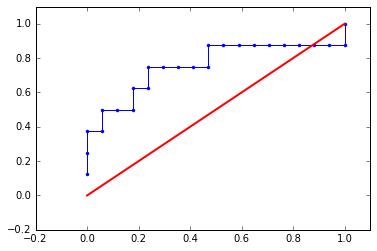

In [4]:
aa=rtp.roc_test_spp1()

[[0.0, 0.0], [0.0, 0.125], [0.0, 0.25], [0.0, 0.375], [0.058823529411764705, 0.375], [0.058823529411764705, 0.5], [0.11764705882352941, 0.5], [0.17647058823529413, 0.5], [0.17647058823529413, 0.625], [0.23529411764705882, 0.625], [0.23529411764705882, 0.75], [0.29411764705882354, 0.75], [0.35294117647058826, 0.75], [0.4117647058823529, 0.75], [0.47058823529411764, 0.75], [0.47058823529411764, 0.875], [0.5294117647058824, 0.875], [0.5882352941176471, 0.875], [0.6470588235294118, 0.875], [0.7058823529411765, 0.875], [0.7647058823529411, 0.875], [0.8235294117647058, 0.875], [0.8823529411764706, 0.875], [0.9411764705882353, 0.875], [1.0, 0.875], [1.0, 1.0]]
lens:  25 8


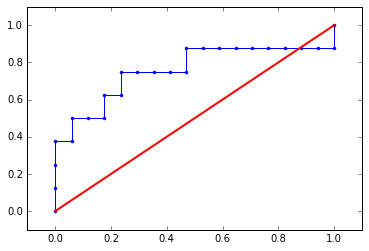

In [5]:
Z_fc = rtp.default_roc_sample['Z_fc']
Z_ev = rtp.default_roc_sample['Z_ev']
#
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=None, h_denom=None)
print(FH)
plt.figure()
plt.clf()
ax=plt.gca()
ax.plot(*zip(*FH), ls='-', marker='.')
ax.plot(range(2), range(2), color='r', ls='-', lw=2.)
#
ax.set_xlim(-.1, 1.1*max([x[0] for x in FH]))
ax.set_ylim(-.1, 1.1*max([x[1] for x in FH]))

print('lens: ', len(Z_fc), len(Z_ev))

[[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [1.0, 3.0], [1.0, 4.0], [2.0, 4.0], [3.0, 4.0], [3.0, 5.0], [4.0, 5.0], [4.0, 6.0], [5.0, 6.0], [6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [8.0, 7.0], [9.0, 7.0], [10.0, 7.0], [11.0, 7.0], [12.0, 7.0], [13.0, 7.0], [14.0, 7.0], [15.0, 7.0], [16.0, 7.0], [17.0, 7.0], [17.0, 8.0]]
lens:  25 8


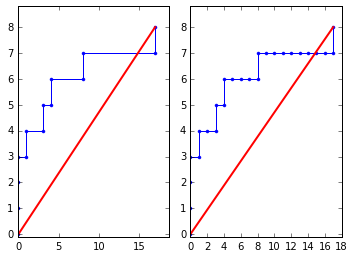

In [6]:
Z_fc = rtp.default_roc_sample['Z_fc']
Z_ev = rtp.default_roc_sample['Z_ev']
#
# apparently, this needs to be revisited; there is an error in the compression
# logic for cases real data sets that the sample data don't hit.
FH0 = rtp.calc_roc_compressed(Z_fc, Z_ev, f_denom=1, h_denom=1, do_compressed=True)
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=1, h_denom=1)

print(FH)
fg=plt.figure()
plt.clf()
#ax1=plt.gca()

ax1 = fg.add_axes([.1,.1, .35,.8])
ax2 = fg.add_axes([.5, .1, .35,.8], sharey=ax1)

ax1.plot(*zip(*FH0), ls='-', marker='.')
ax1.plot(numpy.arange(2)*FH0[-1][0], numpy.arange(2)*FH0[-1][1], color='r', ls='-', lw=2.)

ax2.plot(*zip(*FH), ls='-', marker='.')
ax2.plot(numpy.arange(2)*FH[-1][0], numpy.arange(2)*FH[-1][1], color='r', ls='-', lw=2.)
#
ax1.set_xlim(-.1, 1.1*max([x[0] for x in FH]))
ax1.set_ylim(-.1, 1.1*max([x[1] for x in FH]))

print('lens: ', len(Z_fc), len(Z_ev))

In [7]:
mc=5.0
ROC_datas = rtp.ROC_xyz_handler('test_data/nepal_etas_20150507_b.xyz', 
                                 'test_data/catalog_to_15may_xym.csv', z_event_min=mc)


In [8]:
ROC_datas.z_events[0:10]

[8.4903312409352397e-10,
 6.89583153414527e-10,
 6.89583153414527e-10,
 5.822529747467432e-10,
 5.6876012790766336e-10,
 5.6876012790766336e-10,
 5.6672691188364809e-10,
 4.5420722572367128e-10,
 3.9884461738976359e-10,
 2.6667086863453617e-10]

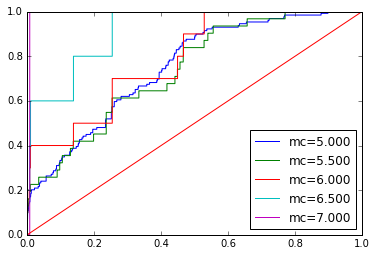

In [9]:
plt.figure()
plt.clf()

for mc in (5.0,5.5, 6.0, 6.5, 7.0):
    # look into these data sets, namely the catalog. preliminary tests of
    # the new etas_roc() tools looks a lot more like the ROC figures we originally published,
    # so maybe this actually a catalog for today (~ july 2016)?
    #
    # check this test catalog. the tests in etas_roc_tools.py show much improved ROC, so
    # maybe this is (inadvertently) a more recent catalog, maybe ~ july 2016?
    #
    ROC_datas = rtp.ROC_xyz_handler('test_data/nepal_etas_20150507_b.xyz', 
                                 'test_data/catalog_to_15may_xym.csv', z_event_min=mc)
    FH = rtp.calc_roc(ROC_datas.fc_xyz['z'], 
                                 ROC_datas.z_events)
    plt.plot(*zip(*FH), ls='-', marker='', label='mc={:.3f}'.format(mc))

plt.plot(range(2), range(2), color='r', marker='', ls='-')
plt.legend(loc=0, numpoints=1)

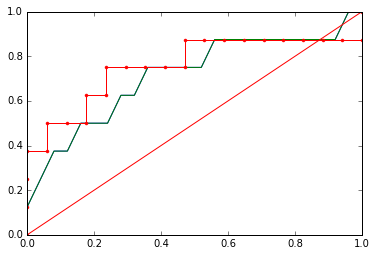

In [10]:
f_denom=None
h_denom=None
FH_m  = rtp.calc_molchan_sum(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)
FH_m2 = rtp.calc_molchan(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)

plt.figure()
plt.plot(*zip(*FH_m))
plt.plot(*zip(*FH_m2))
plt.plot(*zip(*FH), marker='.', ls='-')
plt.plot(range(2), range(2), 'r-')

### spatial map validation.
- make a forecast
- put some events in it
- calc ROC and Molchan

[97.0, 93.0, 89.0, 85.0, 82.0, 79.0, 55.0, 46.0]


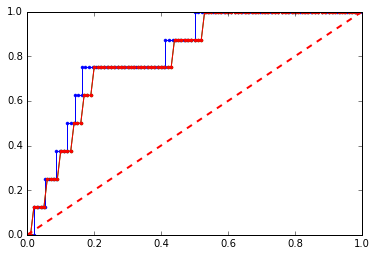

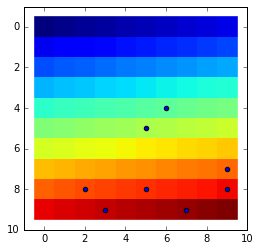

In [11]:
#Zs_fc = numpy.arange(100)
#Zs_fc.shape=((10,10))
fc_xyz = [[x,y,z] for z,(x,y) in enumerate(itertools.product(range(10), range(10)))]
m=5.
ev_xyz = [[5,5,m], [6,4,m], [9,7,m], [2,8,m], [5,8,m], [9,8,m], [3,9,m], [7,9,m]]
#
ROC_handler = rtp.ROC_xyz_handler(fc_xyz, ev_xyz)

print(ROC_handler.z_events)

plt.figure()
plt.plot(*zip(*ROC_handler.calc_roc()), ls='-', marker='.')
plt.plot(*zip(*ROC_handler.calc_molchan()), ls='-', marker='.')
plt.plot(*zip(*ROC_handler.calc_molchan_sum()), ls='-', marker='.')
plt.plot(range(2), range(2), color='r', ls='--', lw=2.)

#print(ROC_handler.calc_molchan())
#plt.figure()
#plt.clf()
#plt.plot(*zip(*ROC_handler.calc_molchan()), ls='-', marker='.')
#
plt.figure()
plt.clf()
ax1=plt.gca()
ax1.imshow(numpy.reshape(ROC_handler.fc_xyz['z'],(10,10)), interpolation='nearest')
ax1.scatter(ROC_handler.events_xyz['x'], ROC_handler.events_xyz['y'], marker='o')

[97.0, 93.0, 89.0, 85.0, 82.0, 79.0, 55.0, 46.0]


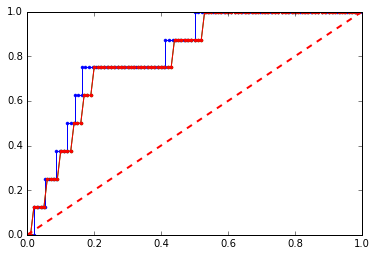

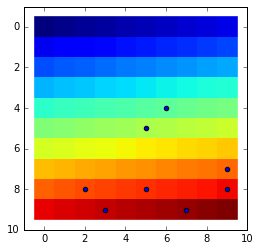

In [12]:
rtp.roc_xyz_test()
